In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [95]:
df=pd.read_csv('train (1).csv')
df.shape

(1460, 81)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [97]:
df_ID=df.pop('Id')
df.shape

(1460, 80)

In [98]:
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

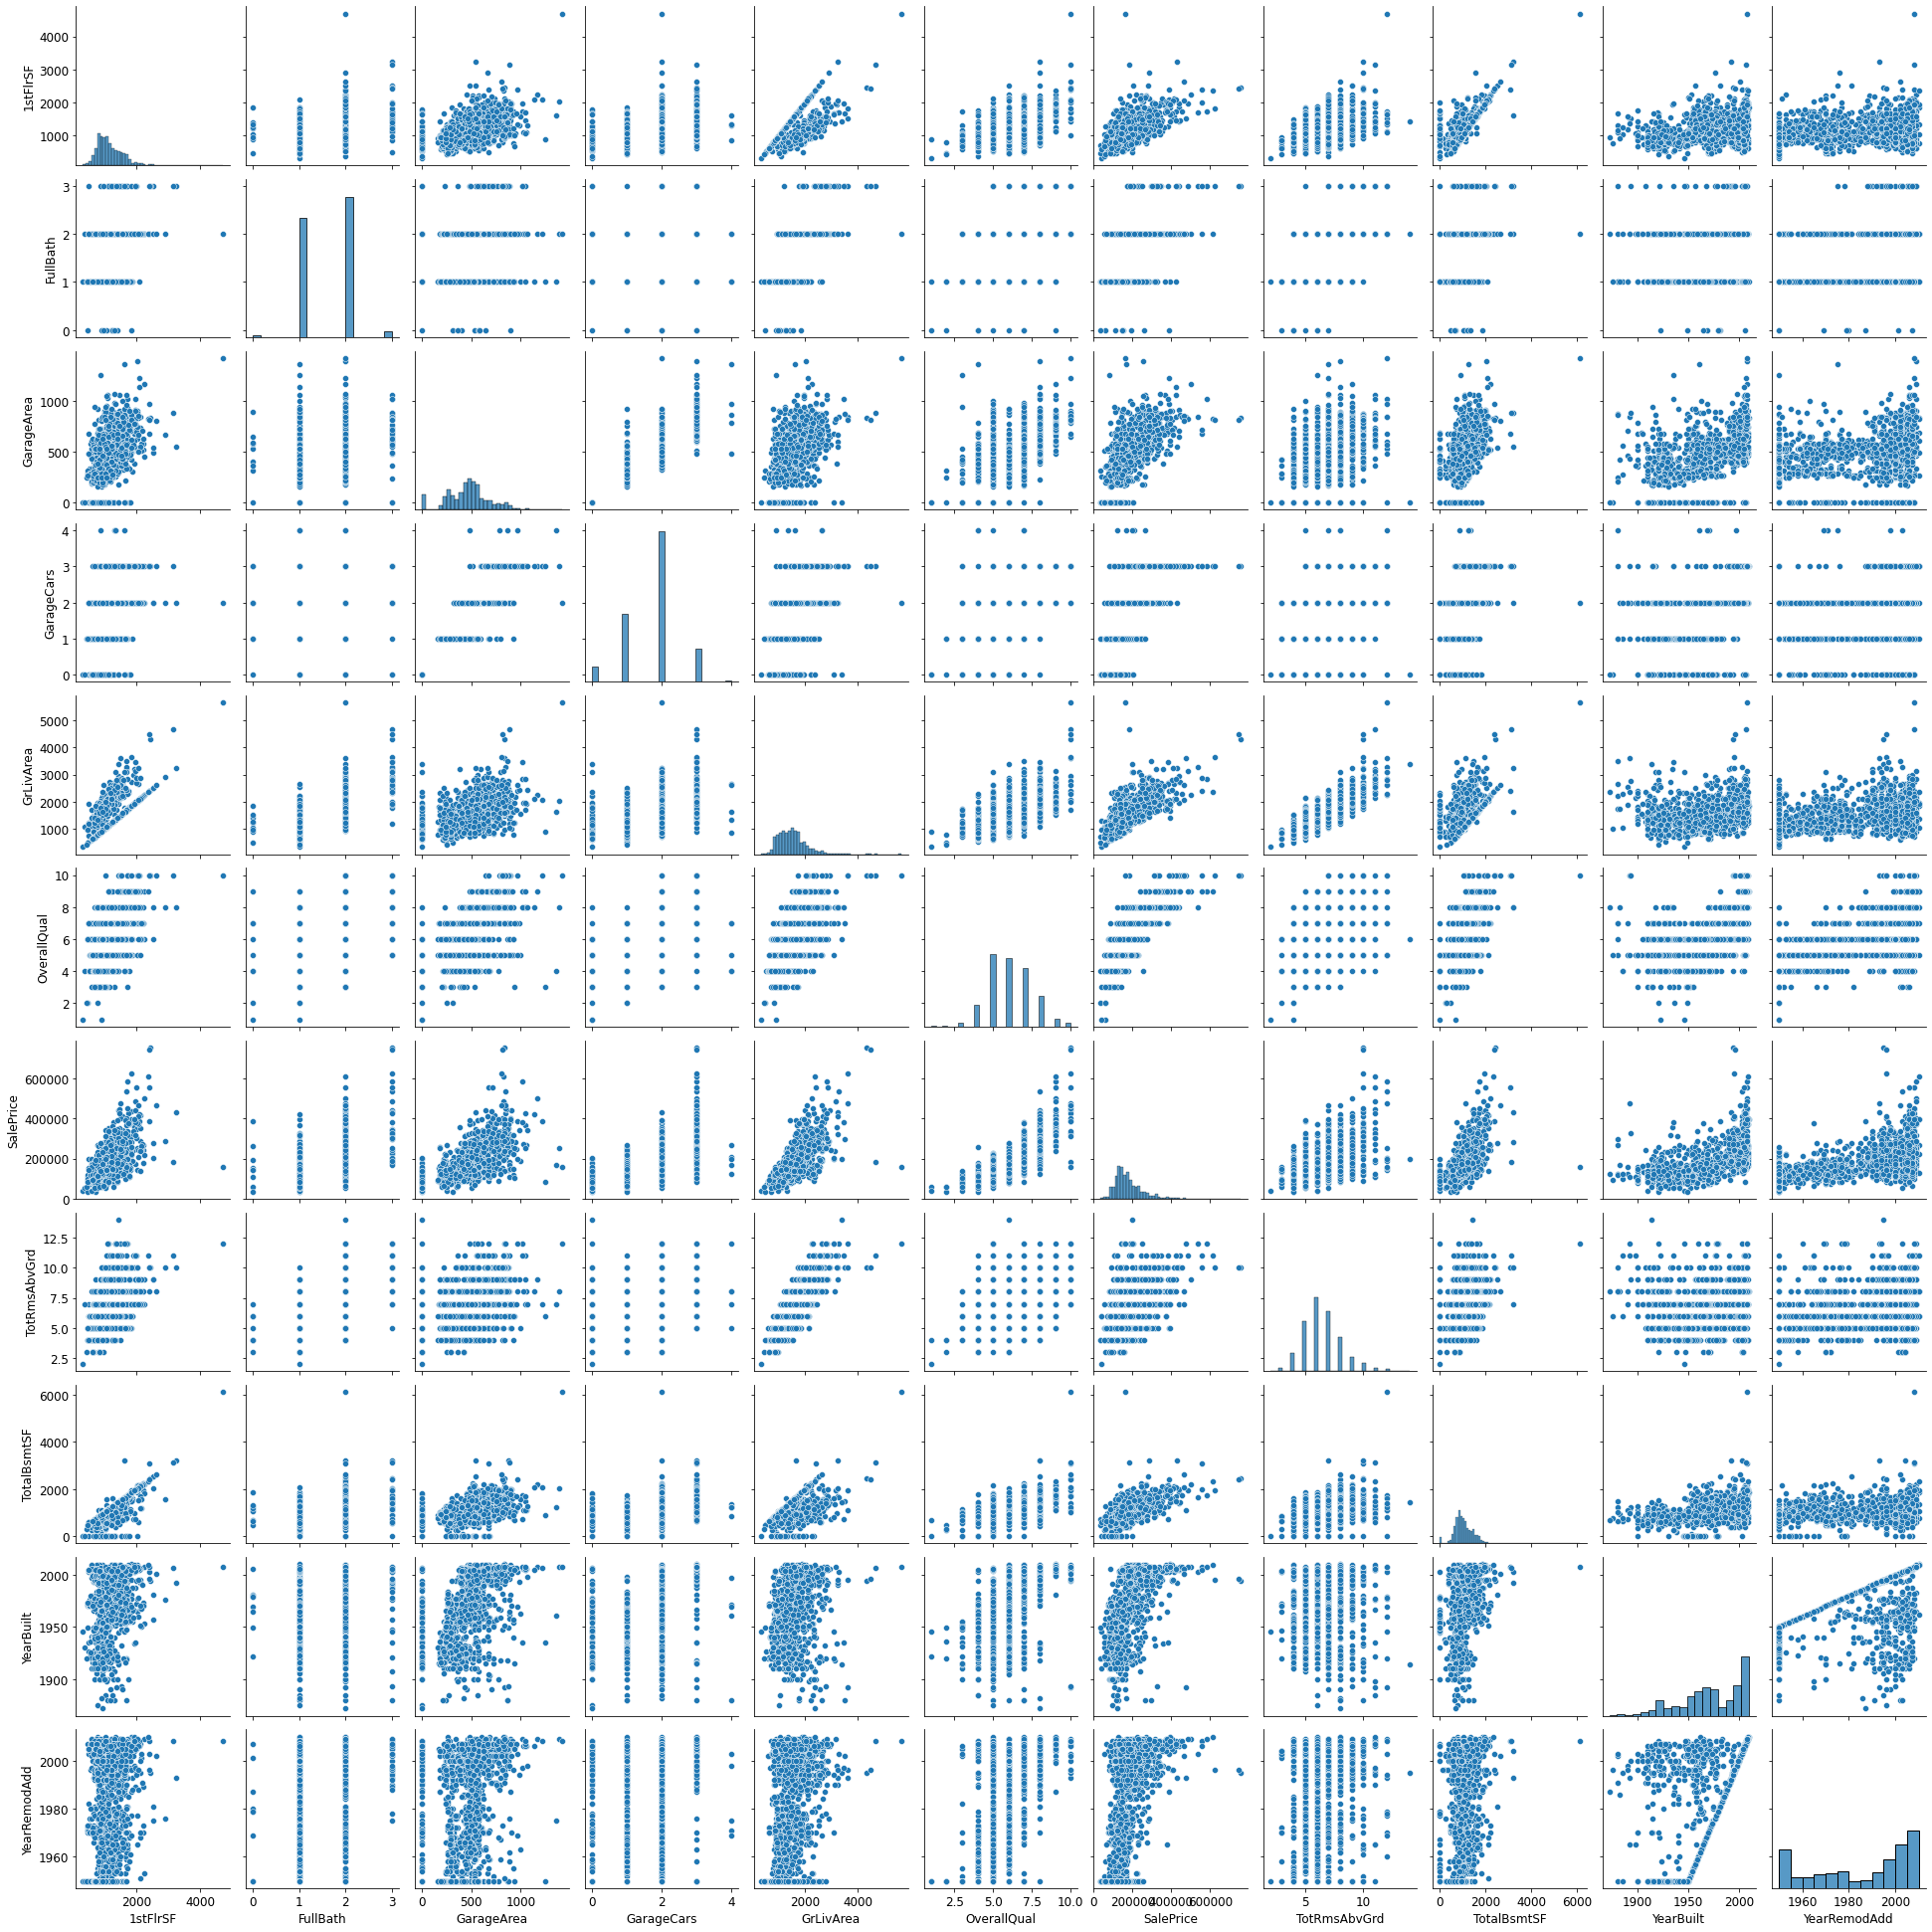

In [99]:
train=df
corr = train[train.columns].corr()['SalePrice'][:].sort_values(ascending=True).to_frame()
corr = corr.drop(corr[corr.SalePrice > 0.99].index)

# pairplot top 10 correlation features + target
top_corr = corr['SalePrice'].sort_values(ascending=False).head(10).index
top_corr = top_corr.union(['SalePrice'])

sns.pairplot(train[top_corr]);

Focusing on the target variable (SalePrice), we can see that there are some outliers in features such as GarageArea, GrLivArea and TotalBsmtSF.

In [100]:
train1 = train.copy()
train1 = train1.drop(train1[(train1['GarageArea']>1200) & (train1['SalePrice']<300000)].index)
train1 = train1.drop(train1[(train1['GrLivArea']>4000) & (train1['SalePrice']<300000)].index)
train1 = train1.drop(train1[(train1['TotalBsmtSF']>5000)].index)

In [101]:
print('Outliers removed =' , train.shape[0] - train1.shape[0])

Outliers removed = 5


In [102]:
train1.isnull().sum().sort_values(ascending=False).head(25)

PoolQC          1449
MiscFeature     1402
Alley           1364
Fence           1174
FireplaceQu      689
LotFrontage      258
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
Fireplaces         0
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

In [103]:
df=train1

In [104]:
df.shape

(1455, 80)

## Fill Nan values

In [105]:
df['PoolQC'] = df['PoolQC'].fillna('None')
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['Alley'] = df['Alley'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [106]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda i: i.fillna(i.median()))

In [107]:
df.isnull().sum().sort_values(ascending=False).head(25)

GarageYrBlt     81
GarageCond      81
GarageFinish    81
GarageQual      81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtCond        37
BsmtQual        37
BsmtFinType1    37
MasVnrType       8
MasVnrArea       8
Electrical       1
KitchenQual      0
TotRmsAbvGrd     0
KitchenAbvGr     0
HalfBath         0
BedroomAbvGr     0
Functional       0
BsmtHalfBath     0
Fireplaces       0
FireplaceQu      0
BsmtFullBath     0
FullBath         0
MSSubClass       0
dtype: int64

In [108]:
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.136140
EnclosedPorch   -0.128896
MSSubClass      -0.084319
OverallCond     -0.079188
YrSold          -0.029424
LowQualFinSF    -0.025689
MiscVal         -0.020285
BsmtHalfBath    -0.016981
BsmtFinSF2      -0.011533
3SsnPorch        0.044565
MoSold           0.046209
PoolArea         0.099551
ScreenPorch      0.111422
BedroomAbvGr     0.167453
BsmtUnfSF        0.214018
BsmtFullBath     0.228782
LotArea          0.269693
HalfBath         0.283578
OpenPorchSF      0.320688
2ndFlrSF         0.320730
WoodDeckSF       0.326133
LotFrontage      0.370373
BsmtFinSF1       0.410350
Fireplaces       0.469387
MasVnrArea       0.482221
GarageYrBlt      0.487762
YearRemodAdd     0.506672
YearBuilt        0.522756
TotRmsAbvGrd     0.537596
FullBath         0.561666
1stFlrSF         0.631771
GarageArea       0.641664
GarageCars       0.645516
TotalBsmtSF      0.651286
GrLivArea        0.734565
OverallQual      0.796004
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [109]:
garage_cols = [col for col in df if col.startswith('Garage')]
df[garage_cols]

# For the numerical features:
for i in df[garage_cols].select_dtypes(exclude='object').columns:
    df[i] = df[i].fillna(0)

# For the categorical features:
for i in df[garage_cols].select_dtypes(include='object').columns:
    df[i] = df[i].fillna('None')

In [110]:
bsmt_cols = [col for col in df if col.startswith('Bsmt')]

# For the numerical features:
for i in df[bsmt_cols].select_dtypes(exclude='object').columns:
    df[i] = df[i].fillna(0)

# For the categorical features:
for i in df[bsmt_cols].select_dtypes(include='object').columns:
    df[i] = df[i].fillna('None')

In [111]:
mas_cols = [col for col in df if col.startswith('Mas')]

# For the numerical features:
for i in df[mas_cols].select_dtypes(exclude='object').columns:
    df[i] = df[i].fillna(0)

# For the categorical features:
for i in df[mas_cols].select_dtypes(include='object').columns:
    df[i] = df[i].fillna('None')

In [112]:
df['MSZoning'] = df.groupby('Neighborhood')['MSZoning'].transform(lambda i: i.fillna(i.value_counts().index[0]))

In [113]:
print('Missing Values left:')
df.isna().sum().sort_values(ascending=False).head(10)

Missing Values left:


Electrical      1
MSZoning        0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
dtype: int64

In [114]:
# replace missing values for mode of each column
df = df.fillna(df.mode().iloc[0])

In [115]:
df.isna().sum().sort_values(ascending=False)

MSSubClass       0
MSZoning         0
GarageYrBlt      0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageCars       0
GarageArea       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
CentralAir       0
HeatingQC        0
LandSlope        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
YearRemodAdd     0
Utilities   

In [116]:
df.shape

(1455, 80)

Converting numerical to categorical 

In [117]:
df['MSSubClass'] = df['MSSubClass'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)           # months is always categorical
df['YrSold'] = df['YrSold'].astype(str)  

In [118]:
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.136140
EnclosedPorch   -0.128896
OverallCond     -0.079188
LowQualFinSF    -0.025689
MiscVal         -0.020285
BsmtHalfBath    -0.016981
BsmtFinSF2      -0.011533
3SsnPorch        0.044565
PoolArea         0.099551
ScreenPorch      0.111422
BedroomAbvGr     0.167453
BsmtUnfSF        0.214018
BsmtFullBath     0.228782
GarageYrBlt      0.261746
LotArea          0.269693
HalfBath         0.283578
OpenPorchSF      0.320688
2ndFlrSF         0.320730
WoodDeckSF       0.326133
LotFrontage      0.370373
BsmtFinSF1       0.410350
Fireplaces       0.469387
MasVnrArea       0.477312
YearRemodAdd     0.506672
YearBuilt        0.522756
TotRmsAbvGrd     0.537596
FullBath         0.561666
1stFlrSF         0.631771
GarageArea       0.641664
GarageCars       0.645516
TotalBsmtSF      0.651286
GrLivArea        0.734565
OverallQual      0.796004
SalePrice        1.000000
Name: SalePrice, dtype: float64

## <center style="font-family:Arial">Adding relevant features</center>

<div style="color:black;
           font-size:120%;
           font-family:Arial">Adding relevant features can increase the accuracy of the prediction.</div>

In [119]:
df['Total_House_SF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['Total_Home_Quality'] = (df['OverallQual'] + df['OverallCond'])/2
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

In [120]:
df.shape

(1455, 83)

In [121]:
df.corr()['SalePrice'].sort_values()

KitchenAbvGr         -0.136140
EnclosedPorch        -0.128896
OverallCond          -0.079188
LowQualFinSF         -0.025689
MiscVal              -0.020285
BsmtHalfBath         -0.016981
BsmtFinSF2           -0.011533
3SsnPorch             0.044565
PoolArea              0.099551
ScreenPorch           0.111422
BedroomAbvGr          0.167453
BsmtUnfSF             0.214018
BsmtFullBath          0.228782
GarageYrBlt           0.261746
LotArea               0.269693
HalfBath              0.283578
OpenPorchSF           0.320688
2ndFlrSF              0.320730
WoodDeckSF            0.326133
LotFrontage           0.370373
BsmtFinSF1            0.410350
Fireplaces            0.469387
MasVnrArea            0.477312
YearRemodAdd          0.506672
YearBuilt             0.522756
TotRmsAbvGrd          0.537596
FullBath              0.561666
Total_Home_Quality    0.596714
1stFlrSF              0.631771
Total_Bathrooms       0.635397
GarageArea            0.641664
GarageCars            0.645516
TotalBsm

In [122]:
numeric_cols = df.select_dtypes(exclude='object').columns

skew_limit = 0.5
skew_vals = df[numeric_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,24.463620
PoolArea,15.932369
LotArea,12.632765
3SsnPorch,10.286243
LowQualFinSF,8.995367
KitchenAbvGr,4.479607
BsmtFinSF2,4.246917
ScreenPorch,4.113996
BsmtHalfBath,4.095176
EnclosedPorch,3.083098


In [123]:
import matplotlib as mpl

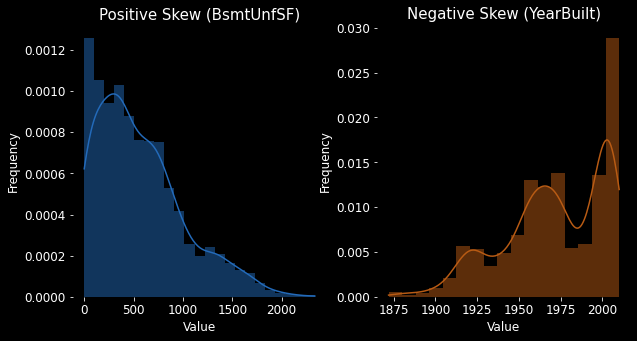

In [124]:
# Font
mpl.rcParams['font.family'] = 'Source Sans Pro'
mpl.rcParams['font.size'] = 12

fig, (ax_positive, ax_negative) = plt.subplots(1, 2, figsize=(10, 5))
fig.patch.set_facecolor('black')
ax_positive.patch.set_facecolor('black')
ax_negative.patch.set_facecolor('black')

sns.histplot(df['BsmtUnfSF'],kde=True, stat='density', linewidth=0, color = '#236AB9', ax=ax_positive)
sns.histplot(df['YearBuilt'], kde=True, stat='density', linewidth=0,color='#B85B14', ax=ax_negative)

ax_positive.tick_params(axis='x', colors='white')
ax_positive.tick_params(axis='y', colors='white')
ax_negative.tick_params(axis='x', colors='white')
ax_negative.tick_params(axis='y', colors='white')

ax_positive.set(ylabel='Frequency', xlabel='Value');
ax_negative.set(ylabel='Frequency', xlabel='Value');

ax_positive.xaxis.label.set_color('white')
ax_positive.yaxis.label.set_color('white')
ax_negative.xaxis.label.set_color('white')
ax_negative.yaxis.label.set_color('white')

ax_positive.set_title('Positive Skew (BsmtUnfSF)', color='white', fontsize= 15)
ax_negative.set_title('Negative Skew (YearBuilt)', color='white', fontsize= 15)



# Remove axes splines
for i in ['top', 'bottom', 'left', 'right']:
    ax_positive.spines[i].set_visible(False)

for i in ['top', 'bottom', 'left', 'right']:
    ax_negative.spines[i].set_visible(False)

## Remove skewness

In [125]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Normalize skewed features
for col in skew_cols.index:
    df[col] = boxcox1p(df[col], boxcox_normmax(df[col] + 1))

C:\Users\asmgoyal\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\asmgoyal\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\stats.py:4053: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficient may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [126]:
numeric_cols = df.select_dtypes(exclude='object').columns

skew_limit = 0.5
skew_vals = df[numeric_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

C:\Users\asmgoyal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1205: RuntimeWarning: overflow encountered in square
  adjusted2 = adjusted ** 2
C:\Users\asmgoyal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1206: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
C:\Users\asmgoyal\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1218: RuntimeWarning: overflow encountered in power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2 ** 1.5)


,Skew
PoolArea,15.623951
3SsnPorch,7.738449
LowQualFinSF,7.386959
MiscVal,5.249877
KitchenAbvGr,3.949509
BsmtHalfBath,3.921332
ScreenPorch,3.324950
BsmtFinSF2,2.641948
EnclosedPorch,2.282834
MasVnrArea,0.958136


In [127]:
df['SalePrice'].skew()

0.030105686801996153

In [128]:
df.corr()['SalePrice'].sort_values()

EnclosedPorch        -0.193267
KitchenAbvGr         -0.144920
MiscVal              -0.060846
LowQualFinSF         -0.055577
BsmtFinSF2           -0.025528
OverallCond          -0.020835
BsmtHalfBath         -0.003907
YearRemodAdd          0.000000
3SsnPorch             0.059268
PoolArea              0.074350
ScreenPorch           0.113674
BedroomAbvGr          0.209944
BsmtUnfSF             0.213470
BsmtFullBath          0.236878
HalfBath              0.311854
2ndFlrSF              0.327860
WoodDeckSF            0.352797
BsmtFinSF1            0.355662
LotFrontage           0.377421
LotArea               0.404812
OpenPorchSF           0.427000
MasVnrArea            0.436998
Fireplaces            0.495995
TotRmsAbvGrd          0.541515
FullBath              0.595016
YearBuilt             0.612883
1stFlrSF              0.614231
GarageYrBlt           0.625252
TotalBsmtSF           0.642590
Total_Home_Quality    0.645429
GarageArea            0.669110
Total_Bathrooms       0.675818
GarageCa

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

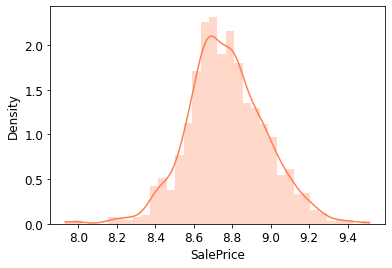

In [129]:
sns.histplot(df['SalePrice'], stat='density', linewidth=0, color = '#ff7f50', kde=True, alpha=0.3)

## Encoding categorical features

In [130]:
categ_cols = df.dtypes[df.dtypes == np.object]        # filtering by categorical variables
categ_cols = categ_cols.index.tolist()                # list of categorical fields

df_enc = pd.get_dummies(df, columns=categ_cols, drop_first=True)   # One hot encoding

C:\Users\asmgoyal\AppData\Local\Temp/ipykernel_19856/92538883.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categ_cols = df.dtypes[df.dtypes == np.object]        # filtering by categorical variables


In [131]:
X=df_enc

In [132]:
X.shape

(1455, 288)

## Scale data

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
scaler=MinMaxScaler()
X[X.columns]=scaler.fit_transform(X[X.columns])

In [135]:
X.shape

(1455, 288)

## Separating y from df

In [136]:
X.shape

(1455, 288)

In [137]:
y=X['SalePrice'].to_frame()

In [138]:
X.pop('SalePrice')
X.shape

(1455, 287)

## Train test split

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [141]:
X_test.shape

(437, 287)

## Modeling

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

#Linear Regression

In [143]:
reg=LinearRegression()

In [144]:
reg.fit(X_train, y_train)
y_train_pred=reg.predict(X_train)
print(r2_score(y_train, y_train_pred))

y_test_pred=reg.predict(X_test)
print(r2_score(y_test, y_test_pred))

0.9620458185420099
-5.812398475134529e+18


In [145]:
print(reg.intercept_)
print(reg.coef_)

[-0.2260506]
[[ 5.74351234e-03  1.59095689e-01 -1.64665929e-01 -1.57177736e-01
   1.26272346e-01  1.68645699e-02 -3.92875924e-03 -1.10389288e-03
  -2.24271052e-02 -4.40989760e-02  1.54617195e-01  8.61615268e-02
   1.14386336e-01  9.24238596e-04  2.18322969e-01 -1.20742446e-01
  -3.43598755e-02 -1.13621404e-01 -4.27474508e-02 -2.82243999e-02
  -4.74142531e-02 -8.76154388e-03  1.07812533e-02 -5.21200413e-03
  -8.11368675e-05  5.27154019e-02  1.92915245e-02  9.02212549e-03
   2.12324009e-02  4.29165293e-03  1.89057803e-02  2.40843158e-01
  -1.30473733e-01  5.81891773e-03  4.88283331e-01  2.25155347e-01
  -3.42086949e-02  3.02551878e-03  1.31899618e-02 -1.74147503e-02
  -3.50992216e-02 -1.16636793e-01 -8.66453004e-02 -3.86302045e-02
  -3.93591243e-02 -2.11758455e-02 -5.06643483e-02 -3.01682012e-02
  -1.09891074e-02 -8.99834485e+09  1.14416056e-01  1.09864304e-01
   1.09038222e-01  1.01966307e-01  4.11761588e-03 -4.27477454e-03
   1.19662022e-02  5.51815050e-03  1.21663435e-02  1.79447312e-

## Ridge

In [146]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 
                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                   10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

#cross validation
folds=5
model_cv_ridge = GridSearchCV(estimator= ridge, 
                       param_grid= params, 
                       scoring= 'neg_mean_absolute_error',
                       cv= folds, 
                       return_train_score= True, 
                       verbose= 1)
model_cv_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [147]:
model_cv_ridge.best_params_

{'alpha': 2.0}

In [148]:
alpha=2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[[ 1.92372782e-02  7.95885690e-02  7.02174570e-02  5.05882183e-02
   6.69609399e-02  1.98981784e-02  3.90321018e-03  3.29739190e-02
   9.07963222e-03 -3.88800110e-04  5.67959174e-02  9.66298394e-02
   7.22382905e-02  8.15675785e-04  9.64956864e-02  9.83435657e-03
   6.46134418e-04  2.32793796e-02  8.22258314e-03 -1.41926678e-02
  -1.89282797e-02  1.90329414e-02  1.47756247e-02 -3.91772584e-04
   1.46641246e-02  4.03001542e-02  2.50282209e-02  1.41546507e-02
   1.39791479e-02  1.57377726e-03  1.69274920e-02  1.75338599e-02
  -1.26486805e-02  8.28199822e-02  6.39246388e-02  2.22141258e-02
  -1.86433162e-02 -3.81876423e-03  9.28610129e-04  1.08967601e-02
  -1.52128693e-02 -3.91637762e-03 -3.86819918e-03 -2.78408577e-03
   2.12197973e-03  1.80454473e-02 -3.05586618e-03 -3.03418726e-03
   3.21746779e-03 -4.95286606e-03  2.62851208e-02  2.98617843e-02
   3.12349023e-02  2.55272903e-02  4.57051632e-03 -6.15214797e-03
   1.23027214e-02  4.74868146e-03  1.27815595e-02  3.81845661e-05
   9.83291

In [150]:
y_pred_train_R=ridge.predict(X_train)
y_pred_test_R=ridge.predict(X_test)

print(r2_score(y_train, y_pred_train_R))
print(r2_score(y_test, y_pred_test_R))

print(mean_squared_error(y_train, y_pred_train_R))
print(mean_squared_error(y_test, y_pred_test_R))

0.9553967718999267
0.8969192402220874
0.000757401543948289
0.001673691095900389


In [163]:
met2=[]
met2.append(r2_score(y_train, y_pred_train_R))
met2.append(r2_score(y_test, y_pred_test_R))

met2.append(mean_squared_error(y_train, y_pred_train_R))
met2.append(mean_squared_error(y_test, y_pred_test_R))

## Lasso

In [151]:
lasso = Lasso()

#cross validation
folds=5
model_cv_lasso = GridSearchCV(estimator= lasso, 
                       param_grid= params, 
                       scoring= 'neg_mean_absolute_error',
                       cv= folds, 
                       return_train_score= True, 
                       verbose= 1)
model_cv_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [152]:
model_cv_lasso.best_params_

{'alpha': 0.0001}

In [153]:
alpha=0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[ 0.00000000e+00  1.21229587e-01  1.67796152e-02  0.00000000e+00
  9.76759463e-02  1.59750493e-02  0.00000000e+00  2.93921559e-02
  2.07397023e-04 -0.00000000e+00  1.04619807e-02  1.22521860e-01
  8.36657858e-02  0.00000000e+00  9.02014028e-02  2.66161260e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.30991447e-02
 -1.68563015e-02 -0.00000000e+00  1.03687842e-02  0.00000000e+00
  1.18041031e-02  4.24388490e-02  2.30862167e-02  9.98002171e-03
  1.16635975e-02 -0.00000000e+00  1.44892161e-02  0.00000000e+00
 -0.00000000e+00  1.56137295e-01  2.01627587e-01  3.72256988e-02
 -9.31139930e-03  0.00000000e+00 -0.00000000e+00  5.29706152e-03
 -1.44814790e-02 -0.00000000e+00  0.00000000e+00 -6.95289380e-04
  0.00000000e+00  1.64600021e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.06689676e-02  5.05274013e-03  2.23134089e-03
  6.10813401e-03  0.00000000e+00  0.00000000e+00 -4.55541122e-03
  8.46952215e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.98700243e-04 -0.00000

In [159]:
met3=[]
y_pred_train_L=lasso.predict(X_train)
y_pred_test_L=lasso.predict(X_test)

print(r2_score(y_train, y_pred_train_L))
met3.append(r2_score(y_train, y_pred_train_L))
print(r2_score(y_test, y_pred_test_L))
met3.append(r2_score(y_test, y_pred_test_L))

# met3.append(np.sum(np.square(y_train- y_pred_train_L)))
# met3.append(np.sum(np.square(y_test- y_pred_test_L)))

print(mean_squared_error(y_train, y_pred_train_L))
met3.append(mean_squared_error(y_train, y_pred_train_L))
print(mean_squared_error(y_test, y_pred_test_L))
met3.append(mean_squared_error(y_test, y_pred_test_L))


0.9504405544935622
0.8986208480086523
0.000841562419194841
0.0016460626053147129


## Table with all the metrics

In [164]:
lr_table={'Metric': ['R2Score train', 'R2 Score test', 'Mse Train', 'Mse test'], 'Ridge': met2 ,'Lasso': met3}
lr_metric=pd.DataFrame(lr_table, columns=['Metric', 'Ridge','Lasso'])
lr_metric

,Metric,Ridge,Lasso
0,R2Score train,0.955397,0.950441
1,R2 Score test,0.896919,0.898621
2,Mse Train,0.000757,0.000842
3,Mse test,0.001674,0.001646


## Feature Selection

In [66]:
betas= pd.DataFrame(index=X.columns)

In [67]:
betas.rows=X.columns

C:\Users\asmgoyal\AppData\Local\Temp/ipykernel_19856/3453710839.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows=X.columns


In [68]:
betas['Lasso']=lasso.coef_

In [69]:
pd.set_option('display.max_rows', None)

In [70]:
betas[betas['Lasso']!=0].shape

(144, 1)

In [71]:
betas[betas['Lasso']!=0]

,Lasso
LotArea,0.121230
OverallQual,0.016780
YearBuilt,0.097676
YearRemodAdd,0.015975
BsmtFinSF1,0.029392
BsmtFinSF2,0.000207
TotalBsmtSF,0.010462
1stFlrSF,0.122522
2ndFlrSF,0.083666
GrLivArea,0.090201


## Variables that are significant in predicting the price of a house

In [73]:
import eli5
eli5.show_weights(lasso, top=-1, feature_names = X_train.columns.tolist())

Weight?,Feature
+0.202,Total_Home_Quality
+0.156,Total_House_SF
+0.123,1stFlrSF
+0.121,LotArea
+0.098,YearBuilt
+0.090,GrLivArea
+0.084,2ndFlrSF
+0.042,GarageArea
+0.037,Neighborhood_Crawfor
+0.037,Total_Bathrooms


## Optimal value of Lambda 

In [74]:
Lambda=pd.DataFrame({'Ridge': [2.0], 'Lasso': [0.0001]})
Lambda

,Ridge,Lasso
0,2.0,0.0001


## When Alpha values are doubles for Ridge and Lasso

In [75]:
alpha_ridge_new=4.0
ridge_new = Ridge(alpha=alpha_ridge_new)

ridge_new.fit(X_train, y_train)
print(ridge_new.coef_)

[[ 1.95911494e-02  6.06383554e-02  6.82048410e-02  4.44315380e-02
   4.81992825e-02  2.12781120e-02  6.62094602e-03  3.64572380e-02
   9.59241010e-03  7.30716364e-03  5.22413237e-02  8.49617362e-02
   5.87480866e-02  4.87205812e-04  8.14437124e-02  1.06471222e-02
   1.08098924e-03  2.61326526e-02  1.02475966e-02 -5.10891684e-03
  -1.27063512e-02  2.55684892e-02  1.63765012e-02  1.13034822e-03
   1.89396482e-02  3.77703472e-02  2.49019451e-02  1.60550778e-02
   1.18707970e-02  1.26326644e-03  1.51854047e-02  1.52696885e-02
  -7.85763674e-03  7.24228352e-02  5.90686487e-02  2.46724670e-02
  -1.86684421e-02 -3.90948273e-03 -1.49000484e-03  1.10524051e-02
  -1.91003901e-02 -5.72983427e-04 -8.04713784e-04 -1.49779811e-03
   3.64188682e-03  1.83678749e-02 -7.75957302e-04 -9.59566872e-04
   1.85645466e-03 -4.04324875e-03  1.60766979e-02  1.94782893e-02
   2.15022929e-02  1.34097728e-02  2.61894691e-03 -6.13178179e-03
   1.23727604e-02  4.75644017e-03  1.15772144e-02 -5.26032165e-04
   8.36844

In [76]:
y_pred_train_R_new=ridge_new.predict(X_train)
y_pred_test_R_new=ridge_new.predict(X_test)

print(r2_score(y_train, y_pred_train_R_new))
print(r2_score(y_test, y_pred_test_R_new))

0.9512863285445482
0.8965697762624587


In [78]:
# Lasso new alpha 

In [79]:
alpha_new=0.0002
lasso_new = Lasso(alpha=alpha_new)

lasso_new.fit(X_train, y_train)
print(lasso_new.coef_)

[ 0.00000000e+00  1.10242615e-01  3.45142736e-02  0.00000000e+00
  7.88937214e-02  1.84707751e-02  0.00000000e+00  3.29671224e-02
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.19890472e-01
  7.66190355e-02  0.00000000e+00  6.78276869e-02  5.74684217e-04
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  7.86158171e-03  0.00000000e+00
  1.37007953e-02  4.52795700e-02  2.20172565e-02  9.80737287e-03
  7.06845563e-03 -0.00000000e+00  1.01432947e-02  0.00000000e+00
  0.00000000e+00  1.77527748e-01  1.94495537e-01  3.84822147e-02
 -5.24434088e-03 -0.00000000e+00 -0.00000000e+00  2.76518564e-03
 -1.85861084e-02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  1.42561251e-02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.13303776e-02  1.62981116e-03  0.00000000e+00
  6.64661641e-03 -2.24819651e-03  0.00000000e+00 -3.03180331e-03
  7.36766226e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000

In [80]:
#Evaluation
y_pred_train_new=lasso_new.predict(X_train)
y_pred_test_new=lasso_new.predict(X_test)

print(r2_score(y_train, y_pred_train_new))
print(r2_score(y_test, y_pred_test_new))

0.9434071780381842
0.9011365903741921


In [81]:
import eli5
eli5.show_weights(lasso_new, top=-1, feature_names = X_train.columns.tolist())

Weight?,Feature
+0.194,Total_Home_Quality
+0.178,Total_House_SF
+0.120,1stFlrSF
+0.110,LotArea
+0.079,YearBuilt
+0.077,2ndFlrSF
+0.068,GrLivArea
+0.045,GarageArea
+0.038,Total_Bathrooms
+0.035,SaleCondition_Partial


## Question 3

In [82]:
X.shape

(1455, 287)

In [84]:
X_quet3=X.drop(columns=['Total_Home_Quality','Total_House_SF','1stFlrSF','LotArea','YearBuilt'])

In [85]:
X_quet3.shape

(1455, 282)

In [86]:
y_quet3=y.copy()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X_quet3, y_quet3, test_size=0.3, random_state=12345)

In [88]:
lasso_quet3 = Lasso()

#cross validation
folds=5
model_cv_lasso_q3 = GridSearchCV(estimator= lasso_quet3, 
                       param_grid= params, 
                       scoring= 'neg_mean_absolute_error',
                       cv= folds, 
                       return_train_score= True, 
                       verbose= 1)
model_cv_lasso_q3.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
model_cv_lasso_q3.best_params_

{'alpha': 0.0001}

In [90]:
alpha_new_q3=0.0001
lasso_new_q3 = Lasso(alpha=alpha_new_q3)

lasso_new_q3.fit(X_train, y_train)
print(lasso_new_q3.coef_)

[ 1.73447799e-02  1.31759627e-01  8.01621427e-02  2.04743445e-02
  0.00000000e+00  3.08969579e-02  0.00000000e+00 -0.00000000e+00
  1.09513897e-01  2.93247461e-02 -6.82911037e-03  3.12787682e-01
  4.29773317e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.22151490e-03 -3.44229594e-02 -0.00000000e+00  1.88945667e-02
  6.19003025e-03  1.75154781e-02  4.92283667e-02  2.46844349e-02
  1.37546203e-02  2.18725004e-03  0.00000000e+00  8.45611577e-03
  0.00000000e+00 -0.00000000e+00  3.43599522e-02 -3.26555890e-02
 -0.00000000e+00 -6.84806323e-03  1.33238213e-02 -1.30022214e-02
 -0.00000000e+00  0.00000000e+00 -6.80538557e-03  1.05431117e-03
  3.18970746e-03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.08315989e-03  7.01922634e-03  2.16141793e-03  9.35571952e-03
  0.00000000e+00  0.00000000e+00 -1.61855296e-03  1.15767825e-02
  3.65499970e-03  7.61948393e-03 -1.53143509e-03  1.31039101e-03
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.61462147e-02
 -3.36497052e-03 -0.00000

In [91]:
#Evaluation
y_pred_train_new_q3=lasso_new_q3.predict(X_train)
y_pred_test_new_q3=lasso_new_q3.predict(X_test)

print(r2_score(y_train, y_pred_train_new_q3))
print(r2_score(y_test, y_pred_test_new_q3))

0.9453442195766052
0.8998483660565386


In [92]:
import eli5
eli5.show_weights(lasso_new_q3, top=-1, feature_names = X_train.columns.tolist())

Weight?,Feature
+0.313,GrLivArea
+0.132,OverallQual
+0.110,TotalBsmtSF
+0.080,OverallCond
+0.065,<BIAS>
+0.049,GarageArea
+0.041,SaleCondition_Partial
+0.035,Neighborhood_StoneBr
+0.034,Total_Bathrooms
+0.031,BsmtFinSF1
